In [80]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한(표시 용)
X_max = 30 # X의 상한(표시 용)
X_n = 16 # X의 상한(표시 용)

# 램덤한 X의 원소 값(5 ~ 30)으로 1xX_n 크기의 행렬 X 
X = 5 + 25*np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

In [9]:
# 리스트 5-1-(2)
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [10]:
# 리스트 5-1-(4)
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


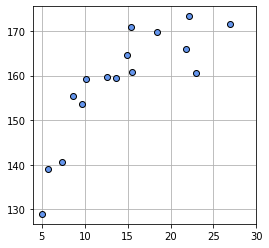

In [81]:
# 리스트 5-1-(5)
# 데이터 그래프 ------------------------------
plt.figure(figsize=(4, 4))

# X 와 T 벡터를 그래프 출력 : marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue'
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
# X의 축의 범위: X_min ~ X_max 지정
plt.xlim(X_min, X_max)

# gird 표시함
plt.grid(True)

plt.show()


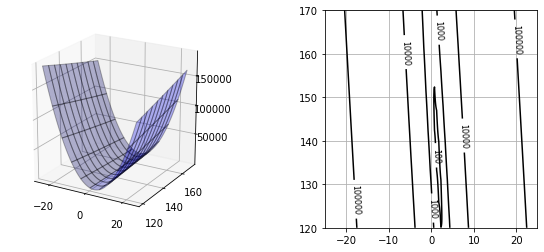

In [82]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D

# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
# mean square error 계산: mse
    mse = np.mean((y - t)**2)
    return mse

# 계산 --------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')

# J 목적함수를 3차원 입체 그래프로 표현: rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black'
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20]) 
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)

# J 목적함수를 3차원 윤곽선 그래프로 표현: 
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


In [83]:
# 리스트 5-1-(7)
# 평균 제곱 오차의 기울기 ------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
# d_w0: 목적 함수에 대한 w0의 미분값, d_w1:목적 함수에 대한 w01의 미분값
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

In [84]:
# 리스트 5-1-(8)
# w0= 10, w1=165로 초기화
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))


[5046.3  301.8]


반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


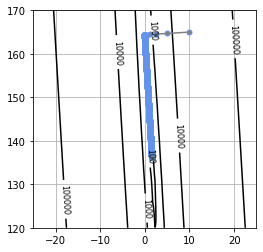

In [85]:
# 리스트 5-1-(9)
# 경사 하강법 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대치
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)

# 구배법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


w0=1.540, w1=136.176
SD=7.002 cm


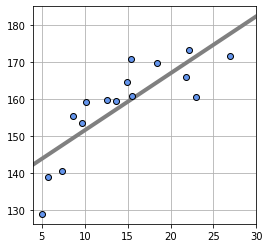

In [86]:
# 리스트 5-1-(10)
# 선 표시 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)


# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T,W )
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
# mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

[  1.55757515 135.87192426]
w0=1.558, w1=135.872
SD=7.001 cm


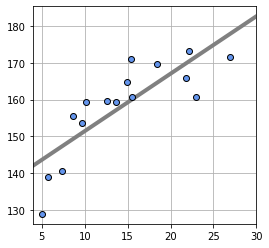

In [158]:
# 리스트 5-1-(11)
# 해석해 ------------------------------------
def fit_line1(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

# 선형 회귀 모델의 해석해

def fit_line2(x, t):
    X = np.ones([len(x),2])
    T = np.zeros([len(t),1])
    for i in range(len(x)):
        T[i]=t[i]
        X[i,0] = x[i]
    
    X_T = np.transpose(X)
    XTX = X_T.dot(X)    
    XTX_inv =np.linalg.inv(XTX)
    XXX = XTX_inv.dot(X_T)
    w = XXX.dot(T)
    return [w[0,0], w[1,0]]

# 메인 ------------------------------------
W = fit_line1(X, T)
print(W)
print("w0={0:.3f}, w1={1:.3f}".format(W[0],W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


In [105]:
# 리스트 5-1-(12)
# 2차원 데이터 생성 --------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [102]:
# 리스트 5-1-(13)
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


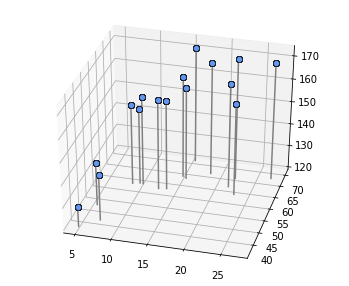

In [159]:
# 리스트 5-1-(14)
# 2차원 데이터의 표시 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()


SD=12.876 cm


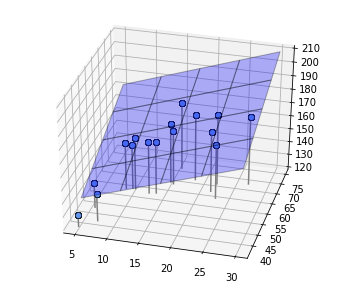

In [157]:
# 리스트 5-1-(15)
#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 

#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse

# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


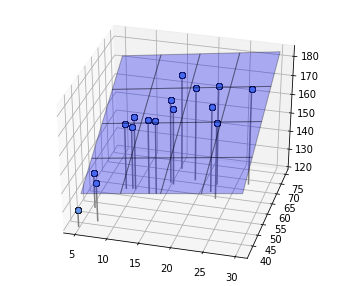

In [132]:
# 리스트 5-1-(16)
# 해석해 ------------------------------------
def fit_plane1(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t) 

def fit_plane2(x0,x1,t):
    X = np.ones([len(x0),3])
    T = np.zeros([len(t),1])
    for i in range(len(x0)):
        X[i,0] = x0[i]
        X[i,1] = x1[i]
        T[i]=t[i]
    X_T = np.transpose(X)
    XTX_inv =np.linalg.inv(X_T.dot(X))
    XXX = XTX_inv.dot(X_T)
    w = XXX.dot(T)
    return [w[0,0], w[1,0], w[2,0]]


# 평편의 기울기  
def dmse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]
  # d_w0  
  # d_w1 
  # d_w2 
    return d_w0,d_w1,d_w2

# 경사하강법  ------------------------------------
def fit_plane_num(x0,x1,t):
    w_init = [10.0, 10.0, 100.0] # 초기 매개 변수 
    alpha = 0.0001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.02 # 반복을 종료 기울기의 절대 값의 한계
    w = w_init
    for i in range(1, i_max):
  # weight 업데이트
    
    return np.array([w[0], w[1], w[2]])

# 메인 ------------------------------------
plt.figure(figsize, 1, 1, projection='3d')
W = fit_plane1(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()